In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import xgi
from matplotlib.gridspec import GridSpec
import cmasher as cmr
import seaborn as sns


import fig_settings as fs
from lcs import *

In [2]:
with open(f"Data/zkc_tmax_comparison.json") as file:
    data = json.load(file)
    tmax = np.array(data["tmax"], dtype=float)
    A = np.array(data["A"], dtype=float)[0, 0, 0]
    Q = np.array(data["Q"], dtype=float)

In [3]:
G = nx.Graph(A.astype(int))

cc = clustering_coefficient(A)
deg = degrees(A)

kc = nx.core_number(G)
coreness = np.zeros(A.shape[0])
coreness[list(kc)] = list(kc.values())


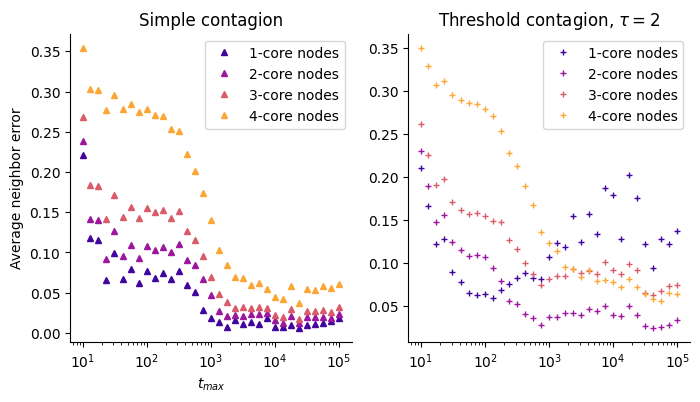

In [4]:
## Coreness

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [coreness.min(), coreness.max()], [0.1, 0.8]))

x = tmax
y1 = np.array([nodal_performance(Q[0, i].mean(axis=0), A) for i in range(len(tmax))]).T
y2 = np.array([nodal_performance(Q[1, i].mean(axis=0), A) for i in range(len(tmax))]).T

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Simple contagion")
for k in np.unique(coreness):
    plt.semilogx(x, y1[np.where(coreness==k)].mean(axis=0), "^", markersize=ms, color=cmap(k), alpha=alpha, label=f"{int(k)}-core nodes")
plt.legend()
plt.ylabel("Average neighbor error")
plt.xlabel(r"$t_{max}$")

plt.subplot(122)
plt.title(r"Threshold contagion, $\tau=2$")
for k in np.unique(coreness):
    plt.semilogx(x, y2[np.where(coreness==k)].mean(axis=0), "+", markersize=ms, color=cmap(k), alpha=alpha, label=f"{int(k)}-core nodes")

plt.legend()
sns.despine()

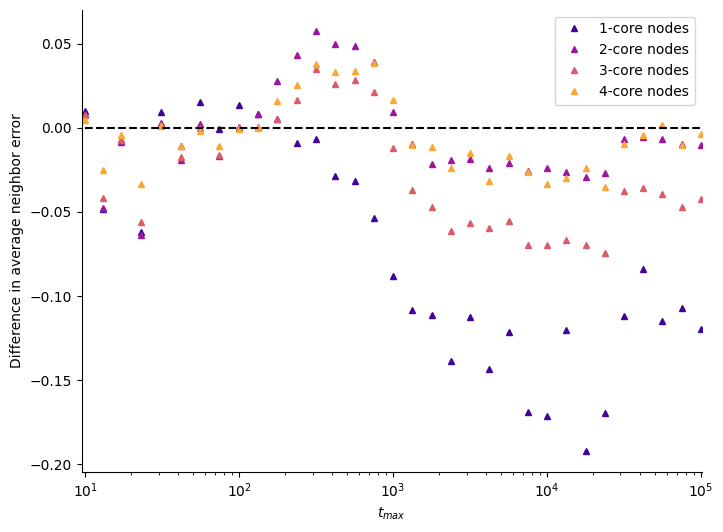

In [14]:
## Coreness difference

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [coreness.min(), coreness.max()], [0.1, 0.8]))

x = tmax
y1 = np.array([nodal_performance(Q[0, i].mean(axis=0), A) for i in range(len(tmax))]).T # simple contagion
y2 = np.array([nodal_performance(Q[1, i].mean(axis=0), A) for i in range(len(tmax))]).T # complex contagion

plt.figure(figsize=(8, 6))

for k in np.unique(coreness):
    plt.semilogx(x, y1[np.where(coreness==k)].mean(axis=0)-y2[np.where(coreness==k)].mean(axis=0), "^", markersize=ms, color=cmap(k), alpha=alpha, label=f"{int(k)}-core nodes")
plt.semilogx(tmax, np.zeros_like(tmax), "k--")

plt.xlim([tmax.min()-0.5, tmax.max()+1000])
plt.legend()
plt.ylabel("Difference in average neighbor error")
plt.xlabel(r"$t_{max}$")

sns.despine()

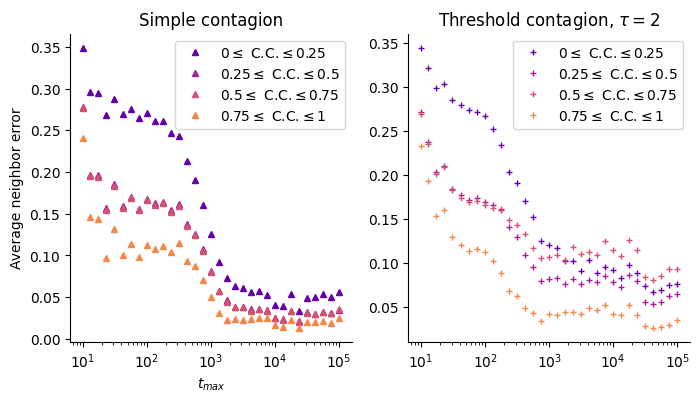

In [5]:
## Clustering coefficient

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [0, 1], [0.1, 0.8]))

x = tmax
y1 = np.array([nodal_performance(Q[0, i].mean(axis=0), A) for i in range(len(tmax))]).T
y2 = np.array([nodal_performance(Q[1, i].mean(axis=0), A) for i in range(len(tmax))]).T

cc_bounds = [[0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1]]

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Simple contagion")
for b in cc_bounds:
    plt.semilogx(x, y1[(b[0]<=cc) & (cc<=b[1])].mean(axis=0), "^", markersize=ms, color=cmap((b[0] + b[1])/2), alpha=alpha, label=rf"{b[0]}$\leq$ C.C.$\leq${b[1]}")
plt.legend()
plt.ylabel("Average neighbor error")
plt.xlabel(r"$t_{max}$")

plt.subplot(122)
plt.title(r"Threshold contagion, $\tau=2$")
for b in cc_bounds:
    plt.semilogx(x, y2[(b[0]<=cc) & (cc<=b[1])].mean(axis=0), "+", markersize=ms, color=cmap((b[0] + b[1])/2), alpha=alpha, label=rf"{b[0]}$\leq$ C.C.$\leq${b[1]}")

plt.legend()
sns.despine()

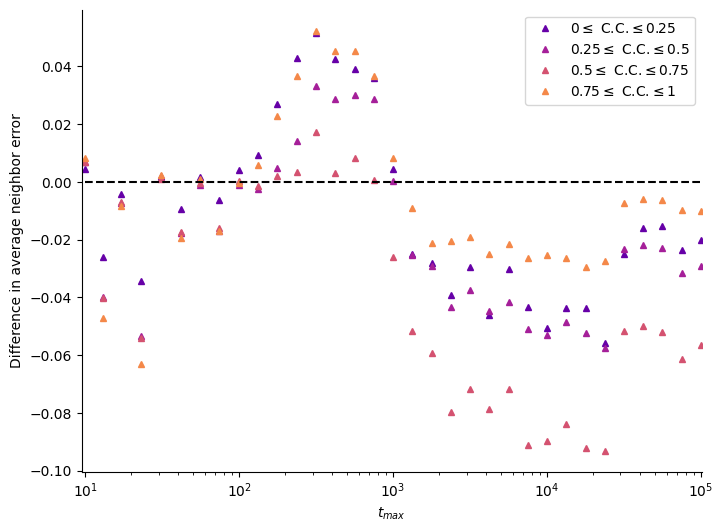

In [16]:
## Clustering coefficient difference

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [0, 1], [0.1, 0.8]))

x = tmax
y1 = np.array([nodal_performance(Q[0, i].mean(axis=0), A) for i in range(len(tmax))]).T
y2 = np.array([nodal_performance(Q[1, i].mean(axis=0), A) for i in range(len(tmax))]).T

cc_bounds = [[0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1]]

plt.figure(figsize=(8, 6))

for b in cc_bounds:
    plt.semilogx(x, y1[(b[0]<=cc) & (cc<=b[1])].mean(axis=0) - y2[(b[0]<=cc) & (cc<=b[1])].mean(axis=0), "^", markersize=ms, color=cmap((b[0] + b[1])/2), alpha=alpha, label=rf"{b[0]}$\leq$ C.C.$\leq${b[1]}")
plt.semilogx(tmax, np.zeros_like(tmax), "k--")

plt.xlim([tmax.min()-0.5, tmax.max()+1000])
plt.legend()
plt.ylabel("Difference in average neighbor error")
plt.xlabel(r"$t_{max}$")

sns.despine()

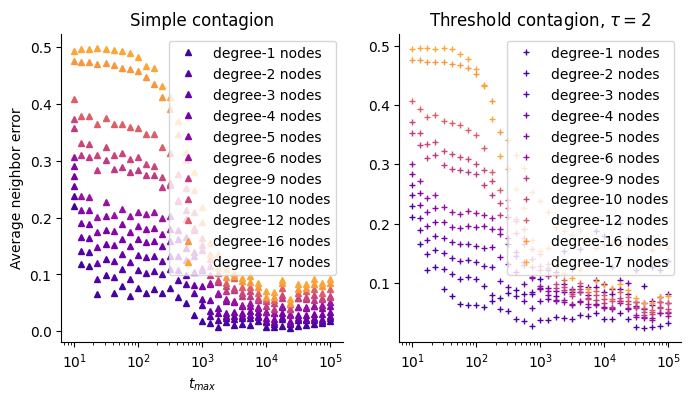

In [6]:
# Degree

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [deg.min(), deg.max()], [0.1, 0.8]))

x = tmax
y1 = np.array([nodal_performance(Q[0, i].mean(axis=0), A) for i in range(len(tmax))]).T
y2 = np.array([nodal_performance(Q[1, i].mean(axis=0), A) for i in range(len(tmax))]).T

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Simple contagion")
for k in np.unique(deg):
    plt.semilogx(x, y1[np.where(deg==k)].mean(axis=0), "^", markersize=ms, color=cmap(k), alpha=alpha, label=f"degree-{int(k)} nodes")
plt.legend()
plt.ylabel("Average neighbor error")
plt.xlabel(r"$t_{max}$")

plt.subplot(122)
plt.title(r"Threshold contagion, $\tau=2$")
for k in np.unique(deg):
    plt.semilogx(x, y2[np.where(deg==k)].mean(axis=0), "+", markersize=ms, color=cmap(k), alpha=alpha, label=f"degree-{int(k)} nodes")

plt.legend()
sns.despine()

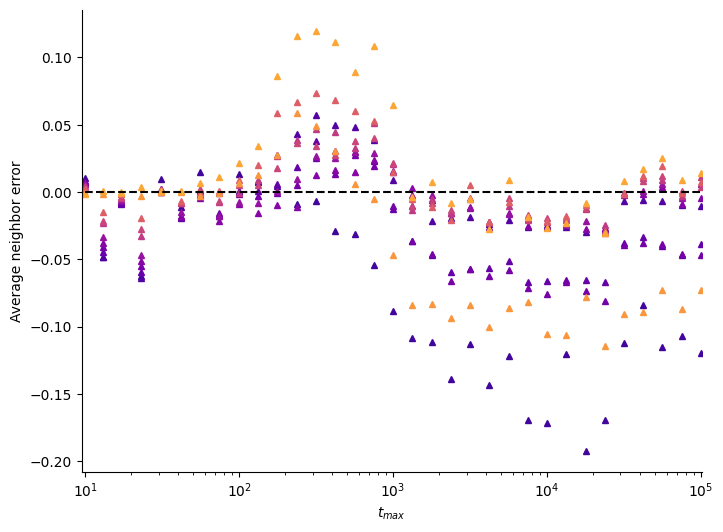

In [19]:
# Degree difference

ms = 4
alpha = 1
colormap = plt.cm.plasma
cmap = lambda x: colormap(np.interp(x, [deg.min(), deg.max()], [0.1, 0.8]))

x = tmax
y1 = np.array([nodal_performance(Q[0, i].mean(axis=0), A) for i in range(len(tmax))]).T
y2 = np.array([nodal_performance(Q[1, i].mean(axis=0), A) for i in range(len(tmax))]).T

plt.figure(figsize=(8, 6))

for k in np.unique(deg):
    plt.semilogx(x, y1[np.where(deg==k)].mean(axis=0) - y2[np.where(deg==k)].mean(axis=0), "^", markersize=ms, color=cmap(k), alpha=alpha, label=f"degree-{int(k)} nodes")
plt.semilogx(tmax, np.zeros_like(tmax), "k--")

plt.xlim([tmax.min()-0.5, tmax.max()+1000])
plt.legend()
plt.ylabel("Average neighbor error")
plt.xlabel(r"$t_{max}$")

sns.despine()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

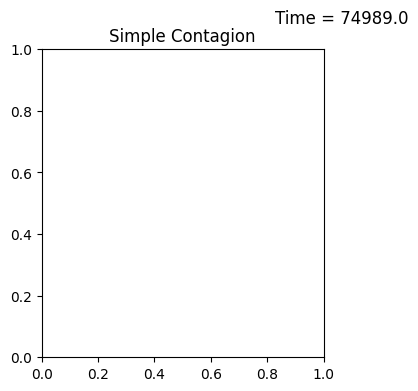

In [7]:
n_c = Q.shape[0]
t_idx = 31
fig = plt.figure(figsize=(8, 4))
plt.suptitle(f"Time = {tmax[t_idx]}")
plt.subplot(121)
plt.title("Simple Contagion")
plt.imshow(Q[0, t_idx].mean(axis=0) - A[0, 0, 0], cmap=cmr.redshift, vmin=-1, vmax=1, aspect="auto")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(122)
plt.title("Complex Contagion")
im = plt.imshow(Q[1, t_idx].mean(axis=0) - A[0, 0, 0], cmap=cmr.redshift, vmin=-1, vmax=1, aspect="auto")
plt.xticks([], [])
plt.yticks([], [])
plt.colorbar(im)

plt.tight_layout()
plt.savefig(f"test_local_learning/test_{t_idx}.png")

In [ ]:
plt.spy(np.abs(Q[1, 32].mean(axis=0) - A[0, 0, 0]) > 0.2)

In [ ]:
G = nx.Graph(np.abs(Q[1, 32].mean(axis=0) - A[0, 0, 0]) > 0.2)

In [ ]:
nx.draw(G, node_size=2, pos=nx.circular_layout(G))